In [1]:
import scanpy as sc
import anndata as ad
import scanpy.external as sce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import squidpy as sq
import scipy.sparse as sp
from scipy import sparse
from scipy.sparse import csr_matrix
import math
import torch
import torch.nn as nn
import time
import torch.nn.functional as F
from itertools import chain
from scanpy import read_10x_h5
import torch.optim as optim
import sklearn
from sklearn.neighbors import kneighbors_graph
import gudhi
import networkx as nx
from torch_geometric.nn import GCNConv
import random
import os
import json 
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pwd
os.getcwd()

'D:\\pythonplaces\\SMILE-main\\Tutorial'

In [3]:
os.chdir('D:\\pythonplaces\\SMILE-main\\Tutorial')

# load data

In [4]:
section_ids = ['S1','S2','S3']
print(section_ids)

['S1', 'S2', 'S3']


In [5]:
adata_l = []
for i in range(len(section_ids)):
    adata_i = sc.read_h5ad('D:\pythonplaces\SMILE-main\dataset\simulation/simulated_'+ section_ids[i]+'_ST_final.h5ad')
    adata_i.obs_names = [x+'_'+section_ids[i] for x in adata_i.obs_names]
    cluster = pd.read_csv('D:\pythonplaces\SMILE-main\dataset\simulation/simulated_' + section_ids[i]+'_true_cluster.csv', sep = '\t')
    cluster.index = adata_i.obs_names
    adata_i.obs['Ground Truth'] = pd.Series(cluster['0'])    
    adata_i.obs['Ground Truth'] = adata_i.obs['Ground Truth'].astype(str)
    adata_i.obs['Ground Truth'] = adata_i.obs['Ground Truth'].astype('category')
    adata_l.append(adata_i)

In [6]:
adata0_sc = sc.read_h5ad('D:\pythonplaces\SMILE-main\dataset\simulation/simulated_sc_final.h5ad') 

In [7]:
adata0_sc

AnnData object with n_obs × n_vars = 10260 × 320
    obs: 'title', 'source_name', 'organism', 'donor_id', 'donor_sex', 'donor_genotype', 'injection_type', 'injection_target', 'injected_material', 'dissected_region', 'dissected_layer', 'facs_gating', 'facs_date', 'rna_amplification_set', 'sequencing_tube', 'sequencing_batch', 'sequencing_qc_pass_fail', 'cell_class', 'cell_subclass', 'cell_cluster', 'molecule', 'SRA_Run', 'GEO_Sample', 'GEO_Sample_Title', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'ref', 'Ground Truth'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'adj_f', 'connectivities', 'distances'

In [37]:
adata0_sc.obs['cell_subclass'].unique()

['L4', 'L2/3 IT', 'L5 IT', 'L6 CT', 'L6 IT', 'L5 PT', 'L6b']
Categories (7, object): ['L2/3 IT', 'L4', 'L5 IT', 'L5 PT', 'L6 CT', 'L6 IT', 'L6b']

In [8]:
adata_l.append(adata0_sc)

In [9]:
len(adata_l)

4

# Run SMILE

In [22]:
from SMILE import SMILE

In [11]:
in_features = len(adata_l[0].var.index)
hidden_features = 512
out_features = 50

In [12]:
tag_l = ['ST','ST','ST','single cell']

In [13]:
feature_method = 'GCNConv'
alpha = 1
beta = 1
gamma = 1000
lamb = 1
theta = 0.9
spatial_regularization_strength= 0.9
lr=1e-3
subepochs=100
epochs=200
max_patience=50
min_stop=20
random_seed=2024
gpu=0
regularization_acceleration=True
edge_subset_sz=1000000
add_topology = True
add_feature = False
add_image = False
add_sc = True
multiscale = True
anchor_type = None
anchors_all = False
use_rep_anchor = 'deconvolution'
align_method = 'MMD'
anchor_size=8000
iter_comb= None
n_clusters_l = [4]
edge_weights = [1,0.1,0.1]

In [23]:
adata_l = SMILE(adata_l, tag_l, section_ids, multiscale,  n_clusters_l, in_features, feature_method, hidden_features, out_features, iter_comb, anchors_all, use_rep_anchor, alpha, beta, lamb, theta, gamma,edge_weights, add_topology, add_feature, add_image, add_sc, spatial_regularization_strength, lr=0.001, subepochs=100, epochs=200,mnn_neigh = 5)

Pretraining to extract embeddings of spots...
feat: tensor([[0.1837, 0.5687, 1.5157,  ..., 1.2767, 0.2209, 2.3890],
        [0.1837, 0.5723, 1.5157,  ..., 1.2685, 0.2101, 2.3826],
        [0.1870, 0.5924, 1.5196,  ..., 1.2698, 0.2240, 2.3694],
        ...,
        [0.0948, 0.6081, 1.0720,  ..., 1.0376, 0.2906, 2.8220],
        [0.0958, 0.5984, 1.0760,  ..., 1.0303, 0.2931, 2.8199],
        [0.0967, 0.6040, 1.0688,  ..., 1.0377, 0.2896, 2.8219]]) tensor([[0.0870, 0.6060, 1.0700,  ..., 1.0388, 0.3001, 2.8133],
        [0.0947, 0.1266, 0.8877,  ..., 0.7821, 0.1145, 2.9518],
        [0.1152, 0.1098, 0.9033,  ..., 0.7794, 0.1335, 2.9602],
        ...,
        [0.1041, 0.6023, 1.0702,  ..., 1.0354, 0.2854, 2.8104],
        [0.1018, 0.6089, 1.0724,  ..., 1.0219, 0.3003, 2.8134],
        [0.1745, 0.5754, 1.5255,  ..., 1.2656, 0.2233, 2.3844]]) None tensor([[1., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0

In [24]:
adata_concat_st = ad.concat(adata_l[0:3], label="slice_name", keys=section_ids)

In [25]:
adata_concat_st.obs['pd_cluster'] = adata_concat_st.obs['pd_cluster'].astype(str)
adata_concat_st.obs['pd_cluster'] = adata_concat_st.obs['pd_cluster'].astype('category')

In [26]:
sc.tl.pca(adata_concat_st)
adata_concat_st.obsm['X_pca_old'] = adata_concat_st.obsm['X_pca'].copy()
adata_concat_st.obsm['X_pca'] = adata_concat_st.obsm['embedding'].copy()
sc.pp.neighbors(adata_concat_st)  
sc.tl.umap(adata_concat_st)

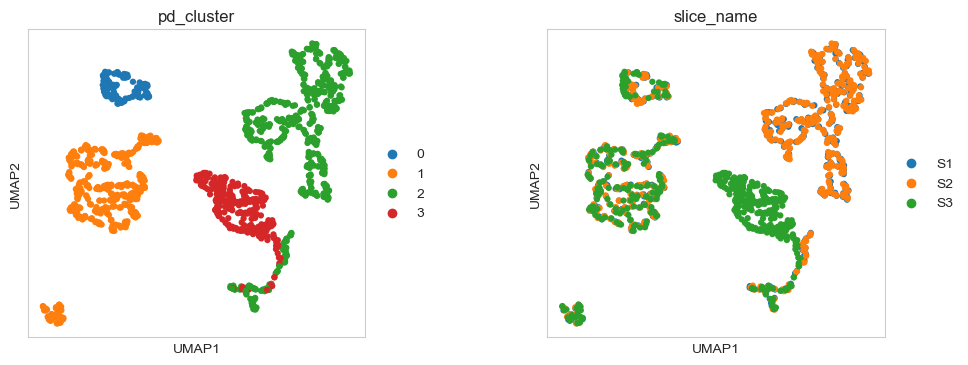

In [27]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata_concat_st,color=["pd_cluster","slice_name"], wspace=0.4, save = 'simulated_umap_cluster_SMILE.pdf')  

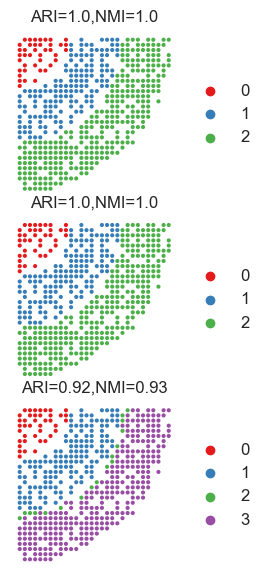

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score as ari_score
from sklearn.metrics import normalized_mutual_info_score as nmi_score
import seaborn as sns
rgb_values = sns.color_palette("Set1", len(adata_concat_st.obs['pd_cluster'].unique()))
color_fine = dict(zip(list(adata_concat_st.obs['pd_cluster'].unique()), rgb_values))
Batch_list = []
for section_id in section_ids:
    Batch_list.append(adata_concat_st[adata_concat_st.obs['slice_name'] == section_id])

spot_size = 0.8
title_size = 12
ARI_list = []
NMI_list = []
for bb in range(len(section_ids)):
    ARI_list.append(round(ari_score(Batch_list[bb].obs['Ground Truth'], Batch_list[bb].obs['pd_cluster']), 2))
    NMI_list.append(round(nmi_score(Batch_list[bb].obs['Ground Truth'], Batch_list[bb].obs['pd_cluster']), 2))

fig, ax = plt.subplots(3,1, figsize=(3.5,7), gridspec_kw={'wspace': 0.05, 'hspace': 0.1})
_sc_0 = sc.pl.spatial(Batch_list[0], img_key=None, color=['pd_cluster'], 
                      legend_loc='right margin', legend_fontsize=12, show=False, ax=ax[0], frameon=False,
                      spot_size=spot_size,palette = color_fine)
_sc_0[0].set_title("ARI=" + str(ARI_list[0])+",NMI=" + str(NMI_list[0]), size=title_size)
_sc_1 = sc.pl.spatial(Batch_list[1], img_key=None, color=['pd_cluster'], 
                      legend_loc='right margin', legend_fontsize=12, show=False, ax=ax[1], frameon=False,
                      spot_size=spot_size,palette = color_fine)
_sc_1[0].set_title("ARI=" + str(ARI_list[1])+",NMI=" + str(NMI_list[1]), size=title_size)

_sc_2 = sc.pl.spatial(Batch_list[2], img_key=None, color=['pd_cluster'], 
                      legend_loc='right margin', legend_fontsize=12, show=False, ax=ax[2], frameon=False,
                      spot_size=spot_size,palette = color_fine)
_sc_2[0].set_title("ARI=" + str(ARI_list[2])+",NMI=" + str(NMI_list[2]), size=title_size)

plt.savefig("simulated_spatial_SMILE.pdf") 
plt.show()

In [29]:
adata_concat_st.write_h5ad("D:\pythonplaces\SMILE-main\SMILE/result\simulate_result.h5ad")

In [30]:
adata_concat_st

AnnData object with n_obs × n_vars = 1470 × 320
    obs: 'Ground Truth', 'pd_cluster', 'slice_name'
    uns: 'pca', 'neighbors', 'umap', 'pd_cluster_colors', 'slice_name_colors'
    obsm: 'X_pca', 'X_umap', 'proportion', 'spatial', 'embedding', 'hidden_spatial', 'reconstruct', 'deconvolution', 'X_pca_old'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [35]:
adata_concat_st.obsm['deconvolution']

array([[2.3306519e-01, 1.8942696e-07, 2.3452662e-01, ..., 1.3051005e-06,
        5.3240639e-01, 1.4665810e-07],
       [2.5275135e-01, 2.3189583e-07, 2.3927231e-01, ..., 1.8003703e-06,
        5.0797385e-01, 2.3885596e-07],
       [2.4398784e-01, 7.1261056e-08, 2.3289388e-01, ..., 5.9443289e-07,
        5.2311748e-01, 5.4273645e-08],
       ...,
       [1.1842264e-03, 3.1838882e-01, 1.9395392e-02, ..., 2.9984432e-01,
        7.4696550e-03, 3.5258979e-01],
       [9.1495320e-05, 2.5049219e-01, 2.3223108e-03, ..., 2.5440085e-01,
        2.3582017e-03, 4.9030188e-01],
       [6.3978347e-05, 2.5010067e-01, 1.7281793e-03, ..., 2.5669500e-01,
        1.9627861e-03, 4.8942697e-01]], dtype=float32)

In [38]:
data=ad.read_h5ad('D:\pythonplaces\SMILE-main\dataset\simulation\simulated_S1_ST_final.h5ad')
data

AnnData object with n_obs × n_vars = 490 × 320
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'proportion', 'spatial'
    varm: 'PCs'
    obsp: 'adj_f', 'adj_t', 'connectivities', 'distances'